In [1]:
%pylab inline
import pandas as pd
from scipy.optimize import curve_fit
from scipy import asarray as ar
from scipy import math
import random

Populating the interactive namespace from numpy and matplotlib


# Importo il dataset

In [2]:
file = pd.read_csv(r'/home/gdeandrea/Scrivania/UNI/Econofisica/MyModels/Epstein/PRESE DATI/A-Valore Soglia/dati_rivolte')
file.head()

,x,y,color,pen down?,x.1,y.1,color.1,pen down?.1,x.2,y.2,color.2,pen down?.2
0,0,1120,55,True,0,0,0,True,0,0,15,True
1,1,1076,55,True,1,7,0,True,1,37,15,True
2,2,868,55,True,2,53,0,True,2,199,15,True
3,3,626,55,True,3,111,0,True,3,383,15,True
4,4,611,55,True,4,167,0,True,4,342,15,True


In [3]:
df = file['y.2']
y = df.to_numpy()
x = ar(range(len(y)))

# Definizioni Utili

## Fit Utils

In [4]:
def chiquadronorm(oss, fit, sigma, ddof, aiuto=False, norm=True):
    'funzione che calcola il chiquadrato di una distribuzione osservata rispetto a una\
    forma funzionale nota'
    
    #prende liste monodimensionali come argomenti
    scarti = []
    scartiquadri = []
    scartiquadridivisi = []
    
    for i in range(len(oss)):
        scarti.append(oss[i]-fit[i])
        scartiquadri.append(scarti[i]*scarti[i])
        scartiquadridivisi.append(scartiquadri[i]/(sigma[i]*sigma[i]))
        
        if (aiuto==True):
            print('scarti= ', scarti[i])
            print('scartiquadri= ', scartiquadri[i])
            print('scartiquadridivisi= ', scartiquadridivisi[i])
            
    chiquadro=sum(scartiquadridivisi)
    chiquadroreg=chiquadro/ddof
    
    if(norm==True):
        return (chiquadroreg)
    else:
        return (chiquadro)
    

def gauss(x,a,x0,sigma,baseline):
    'Ritorna array gaussiano a partire da lista x secondo i parametri a,x0,sigma'
    return (baseline + a*exp(-(x-x0)**2/(sigma*sigma)))


def lore(x, a, x0, y0, baseline):
    'Ritorna array lorentziano a partire da lista x secondo i parametri a,x0,yo'
    return (baseline + a*(y0/(((x - x0)**2) + (y0**2))))

def fattoriale(x):
    temp_list = []

    for ics in x:
        f=1
        for i in range(1,ics+1):
            f*=i
        temp_list.append(f)
    return(temp_list)

def poisson(x, a, media, baseline):
    result = baseline + a*(media**x)*np.exp(-media)/fattoriale(x)
    return(result)

## Selecting Spikes

In [5]:
def isola_spikes (y):
    
    rivolte_diz = {}
    temp_rivolta_list = []
    rivolte_counter = 0
    cerarivolta = False
    
    for i in range(len(y)):
        
        ##aggiustato a 12 per non avere rivoltini
        if y[i] > 12:
            temp_rivolta_list.append(y[i])
            if cerarivolta == False:
                rivolte_counter += 1
                cerarivolta = True
        else:
            if cerarivolta == True:
                lunghezza=len(temp_rivolta_list)
                #if rivolte_counter > 1:
                    #temp_rivolta_list.insert(0, y[i-lunghezza-1])
                    #temp_rivolta_list.insert(0, y[i-lunghezza-2])
                    #temp_rivolta_list.insert(0, y[i-lunghezza-3])
                #else:
                    #temp_rivolta_list.insert(0, 0)
                    #temp_rivolta_list.insert(0, 0)
                    #temp_rivolta_list.insert(0, 0)
                    
                #temp_rivolta_list.append(y[i])
                #temp_rivolta_list.append(y[i+1])
                #temp_rivolta_list.append(y[i+2])
                rivolte_diz[str(rivolte_counter)+'_rivolta'] = temp_rivolta_list
                temp_rivolta_list = []
                cerarivolta = False
                
    return rivolte_diz

# Analisi

## Creo dizionario delle rivolte

In [6]:
rivolte_dict = isola_spikes(y)

## Seleziono N spikes a caso

In [7]:
N = 5
choosen_list = random.sample(list(rivolte_dict.keys()), k=N)
choosen_list

['10_rivolta', '16_rivolta', '18_rivolta', '8_rivolta', '3_rivolta']

In [8]:
bellerivolte = ['5_rivolta', '15_rivolta', '3_rivolta', '7_rivolta', '18_rivolta']

In [9]:
choosen_list = bellerivolte

## Fit Gauss&Lore con Chiqudrati

amplitude: 336.09285010806246
mean: 3.446484463255342
errore:  [6.         6.55743852 8.77496439 9.74679434 8.83176087 7.
 6.55743852 6.164414   3.60555128]
amplitude: 747.8321356278345
mean: 3.742333112054698
errore:  [ 4.89897949  8.30662386 11.         13.11487705 12.16552506 10.44030651
  8.77496439  6.164414    4.58257569]
amplitude: 808.6531456446544
mean: 3.141078996512608
errore:  [ 5.65685425 10.29563014 13.         13.22875656 11.74734012  9.48683298
  6.40312424]
amplitude: 809.7136438245176
mean: 3.0372136627965927
errore:  [ 6.244998    8.94427191 12.92284798 13.19090596 11.48912529  9.
  4.35889894]
amplitude: 783.730292828921
mean: 4.064242216877267
errore:  [ 4.58257569  8.30662386  9.89949494 12.36931688 13.34166406 11.61895004
  9.79795897  6.63324958]


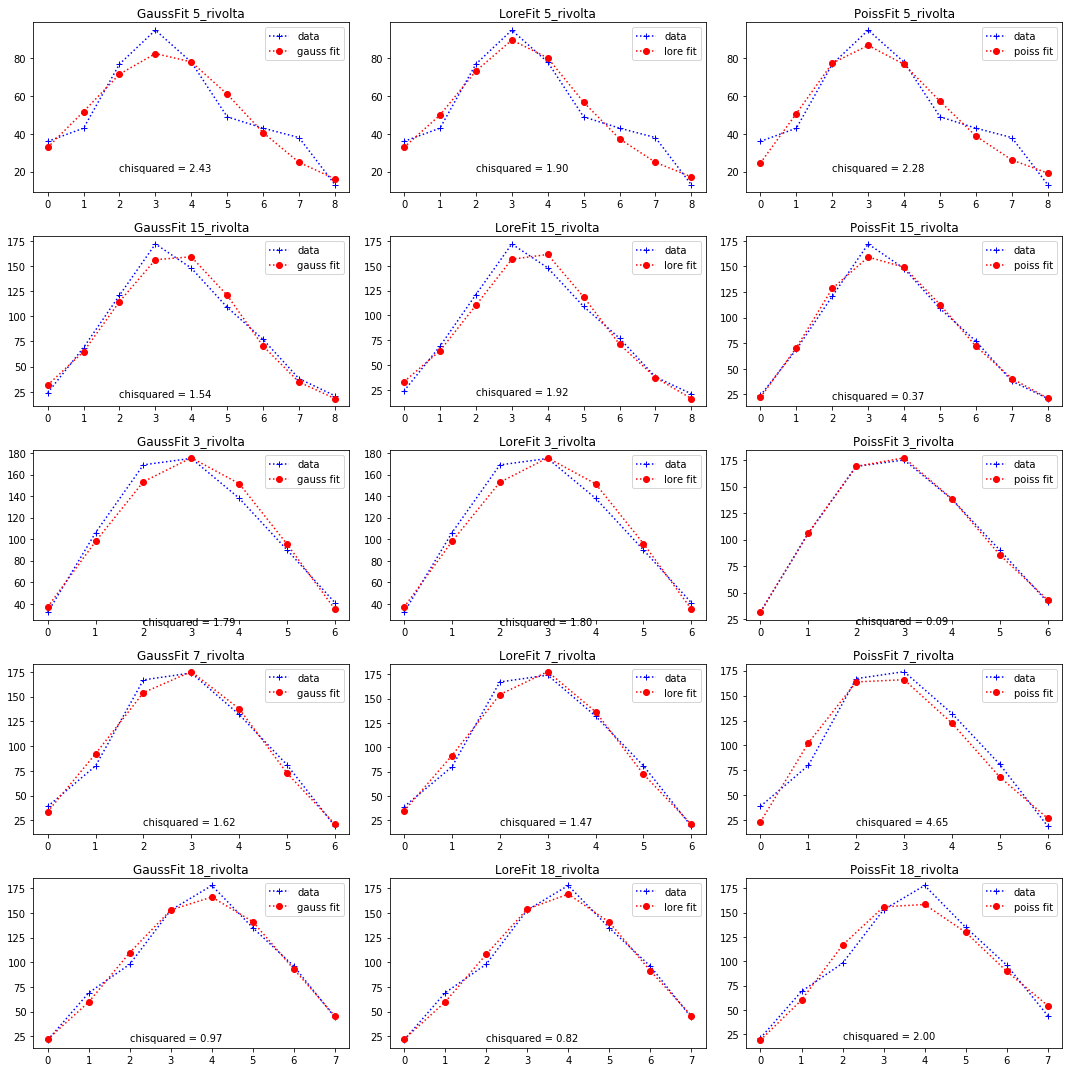

In [10]:
fig, ax = plt.subplots(nrows=len(choosen_list), ncols=3, figsize=(15,15))


for i, rivolta in enumerate(choosen_list):
    
    y = rivolte_dict[rivolta]
    x = range(len(y))
    ##computo errore come radice dei conteggi
    sigma_gauss = np.where(np.sqrt(y)==0,1,np.sqrt(y))
    ##computo errore come larghezza a metà altezza
    #sigma_gauss = 2*sqrt(np.abs(gauss_params[2]*gauss_params[2]*2*log(2)))
    gauss_params,gauss_cov = curve_fit(gauss,x,y,p0=[200.,3.,2.5,0],sigma=sigma_gauss)
    gauss_red_chisq = chiquadronorm(y, gauss(x,*gauss_params), sigma_gauss, len(y)-len(gauss_params), norm=True)
    #print('amplitude:', gauss_params[0])
    #print('mean:', gauss_params[1])
    #print('sigma:', gauss_params[2])
    #print('baseline: ', gauss_params[3])
    #print('errore: ', sigma_gauss)
    
    sigma_lore = sigma_gauss
    lore_params,lore_cov = curve_fit(lore,x,y,p0=[-500.,3.,-2.,-30.],sigma=sigma_gauss)
    lore_red_chisq = chiquadronorm(y, lore(x,*lore_params), sigma_lore, len(y)-len(lore_params), norm=True)
    #print('amplitude:', lore_params[0])
    #print('mean:', lore_params[1])
    #print('y0:', lore_params[2])
    #print('baseline:', lore_params[3])
    #print('errore: ', sigma_lore)
    
    sigma_poiss = sigma_gauss 
    poiss_params,poiss_cov = curve_fit(poisson,x,y, p0=[400.,3.,0], sigma=sigma_poiss)
    poiss_red_chisq = chiquadronorm(y, poisson(x, *poiss_params), sigma_poiss, len(y)-len(poiss_params), norm=True)
    print('amplitude:', poiss_params[0])
    print('mean:', poiss_params[1])
    print('errore: ', sigma_poiss)
    
    ax[i][0].plot(x,y,'b+:',label='data')
    ax[i][0].plot(x,gauss(x,*gauss_params),'ro:',label='gauss fit')
    ax[i][0].legend()
    ax[i][0].text(2,20,'chisquared = %.2f' % (gauss_red_chisq))
    ax[i][0].title.set_text('GaussFit ' + rivolta)
    
    ax[i][1].plot(x,y,'b+:',label='data')
    ax[i][1].plot(x,lore(x,*lore_params),'ro:',label='lore fit')
    ax[i][1].legend()
    ax[i][1].text(2,20,'chisquared = %.2f' % (lore_red_chisq))
    ax[i][1].title.set_text('LoreFit ' + rivolta)
    
    ax[i][2].plot(x,y,'b+:',label='data')
    ax[i][2].plot(x,poisson(x,*poiss_params),'ro:',label='poiss fit')
    ax[i][2].legend()
    ax[i][2].text(2,20,'chisquared = %.2f' % (poiss_red_chisq))
    ax[i][2].title.set_text('PoissFit ' + rivolta)

fig.tight_layout()
plt.show()

In [11]:
ipsilon = rivolte_dict['13_rivolta']
ics = range(len(ipsilon))
err_ipsilon = np.where(np.sqrt(ipsilon) == 0, 1, np.sqrt(ipsilon))
print(ipsilon)
print(err_ipsilon)


[33, 129, 360, 327, 278, 224, 170, 110, 57]
[ 5.74456265 11.35781669 18.97366596 18.08314132 16.673332   14.96662955
 13.03840481 10.48808848  7.54983444]


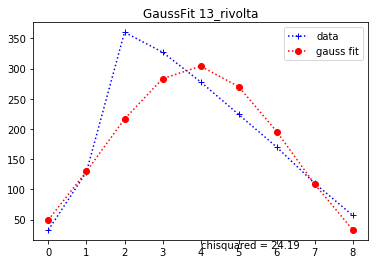

In [12]:
params, coeff = curve_fit(gauss, ics, ipsilon, p0=[200.,3.,2.5,0], sigma=err_ipsilon)
my_chisq = chiquadronorm(ipsilon, gauss(ics,*params), err_ipsilon, len(y)-len(params), norm=True)
plt.plot(ics,ipsilon,'b+:',label='data')
plt.plot(ics,gauss(ics,*params),'ro:',label='gauss fit')
plt.legend()
plt.text(4,2,'chisquared = %.2f' % (my_chisq))
plt.title('GaussFit ' + '13_rivolta')
plt.show()


In [17]:
landau_prob = @(x) exp(-(x+exp(-x)/2))/sqrt(2*pi)

SyntaxError: invalid syntax (<ipython-input-17-e8ba19cdff11>, line 1)

In [18]:
import pylandau

ValueError: x and y must have same first dimension, but have shapes (10000,) and (8,)

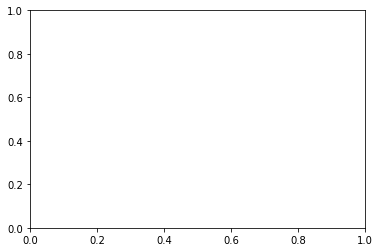

In [19]:
x = np.arange(0, 100, 0.01)

y_landau = pylandau.landau(x)

plt.plot(x,y)

In [13]:
ipsilon = rivolte_dict['5_rivolta']
ics = range(len(ipsilon))
err_ipsilon = np.where(np.sqrt(ipsilon) == 0, 1, np.sqrt(ipsilon))
print(ipsilon)
print(err_ipsilon)


[36, 43, 77, 95, 78, 49, 43, 38, 13]
[6.         6.55743852 8.77496439 9.74679434 8.83176087 7.
 6.55743852 6.164414   3.60555128]


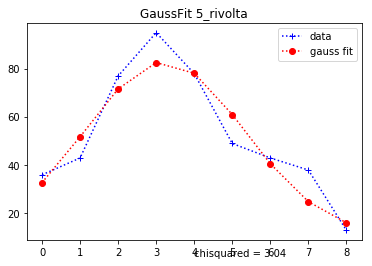

In [14]:
params, coeff = curve_fit(gauss, ics, ipsilon, p0=[200.,6.,2.5,0], sigma=err_ipsilon)
my_chisq = chiquadronorm(ipsilon, gauss(ics,*params), err_ipsilon, len(y)-len(params), norm=True)
plt.plot(ics,ipsilon,'b+:',label='data')
plt.plot(ics,gauss(ics,*params),'ro:',label='gauss fit')
plt.legend()
plt.text(4,2,'chisquared = %.2f' % (my_chisq))
plt.title('GaussFit ' + '5_rivolta')
plt.show()


### 

In [15]:
from scipy.stats import chisquare

In [16]:
chisquare(ics, ipsilon)

Power_divergenceResult(statistic=407.93503290438065, pvalue=3.758097954504254e-83)